In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
sns.set()

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


Data Cleaning

In [4]:
data.drop(["id", "Unnamed: 0"], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
data_clean = data.copy()

In [8]:
arrival_delay_median = data_clean["Arrival Delay in Minutes"].median()
data_clean["Arrival Delay in Minutes"] = data_clean["Arrival Delay in Minutes"].fillna( value = arrival_delay_median)

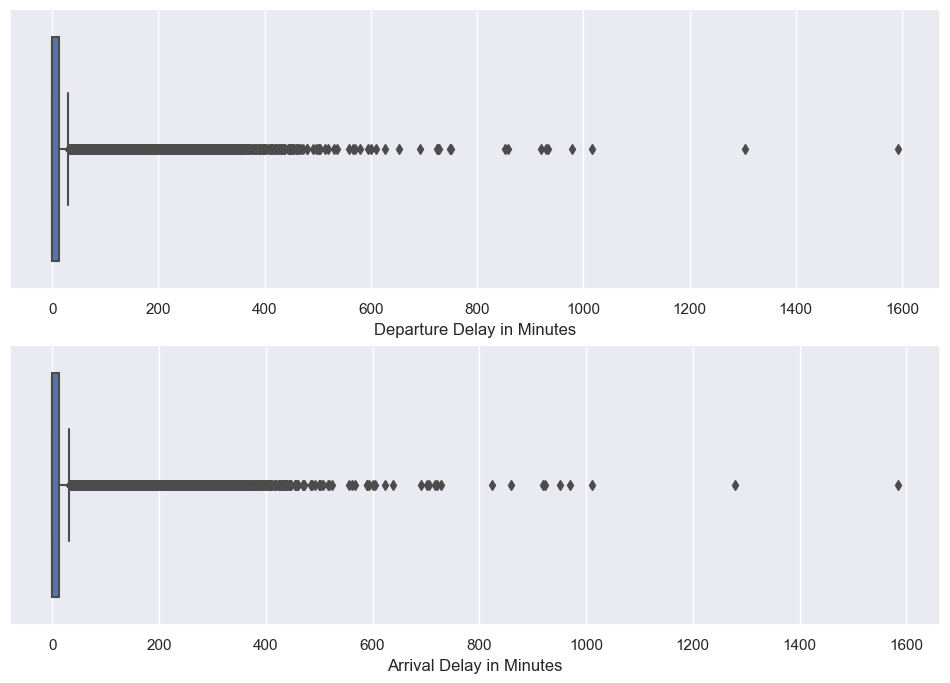

In [9]:
cols = ["Departure Delay in Minutes", "Arrival Delay in Minutes"]
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
for i, column in enumerate(cols):
    sns.boxplot(data = data, x = column,ax = ax[i])


In [10]:
columns = data.columns.values

In [11]:
data_eda = data.copy()

<AxesSubplot:>

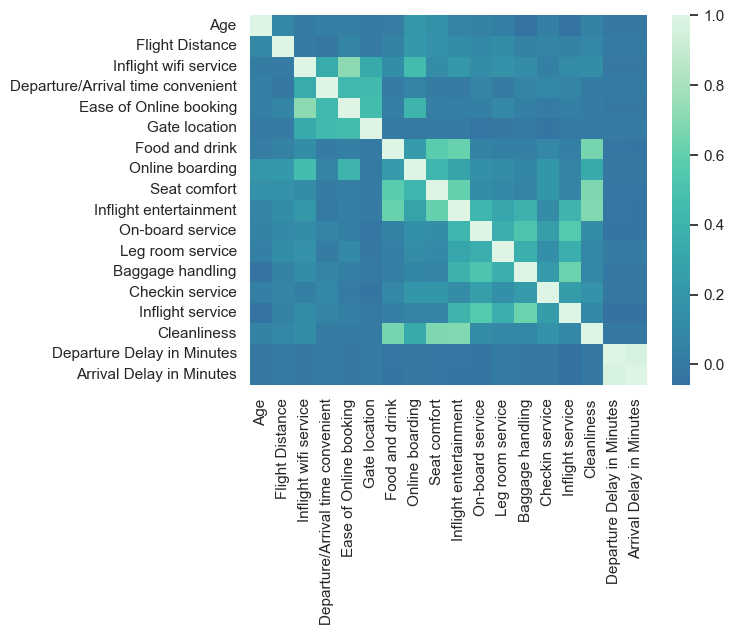

In [22]:
sns.heatmap(data_eda.corr(),cmap='mako',center = 0)

In [24]:
data_eda["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)


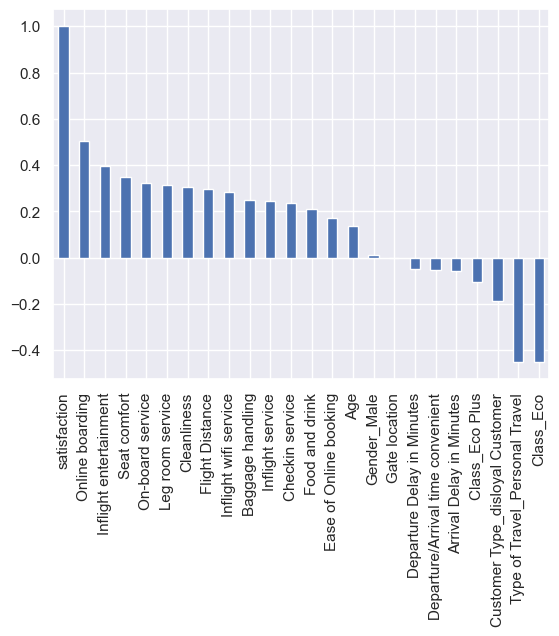

In [25]:
data_dummies = pd.get_dummies(data_eda,drop_first = True)
data_dummies.corr()['satisfaction'].sort_values(ascending=False).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

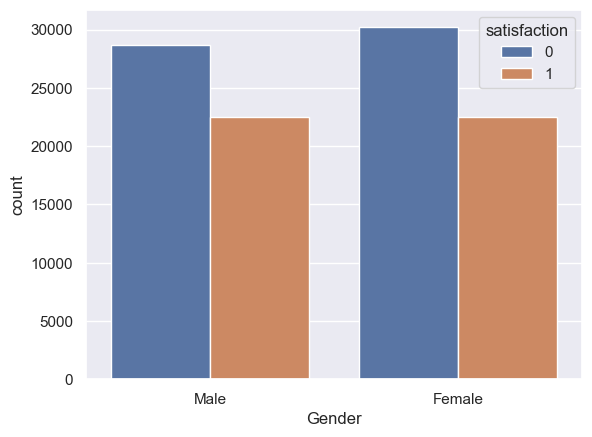

In [27]:
sns.countplot(data = data_eda,x=data_eda['Gender'],hue=data_eda['satisfaction'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

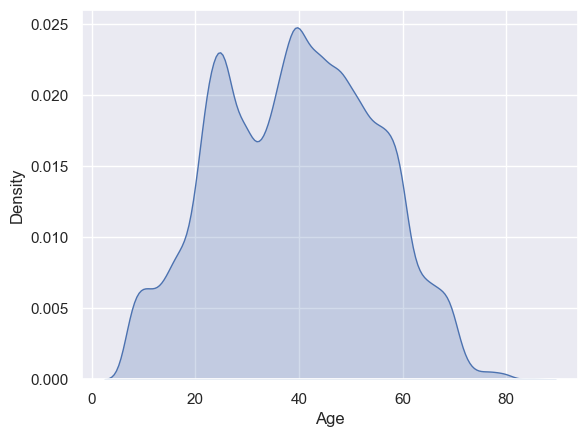

In [28]:
sns.kdeplot(data= data_eda,x= data_eda['Age'],fill=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

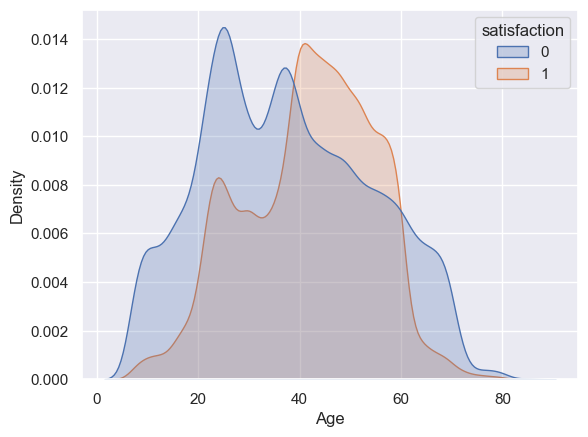

In [29]:
sns.kdeplot(data= data_eda,x= data_eda['Age'],hue = data_eda['satisfaction'],fill=True)

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

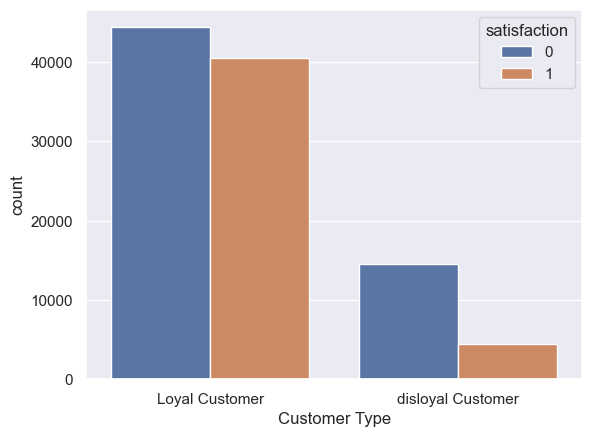

In [30]:
sns.countplot(data = data_eda,x=data_eda['Customer Type'],hue=data_eda['satisfaction'])

<AxesSubplot:xlabel='Class', ylabel='count'>

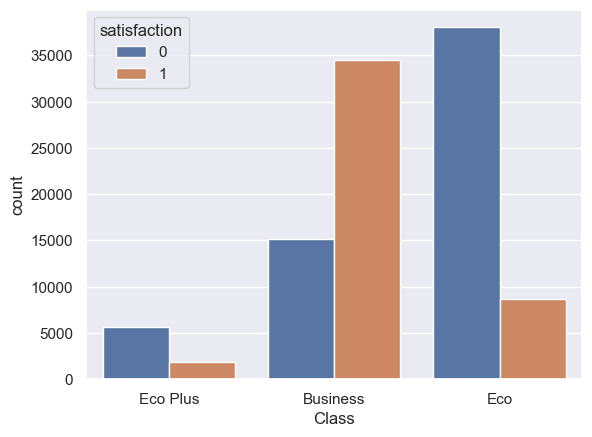

In [31]:
sns.countplot(data = data_eda,x=data_eda['Class'],hue=data_eda['satisfaction'])

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

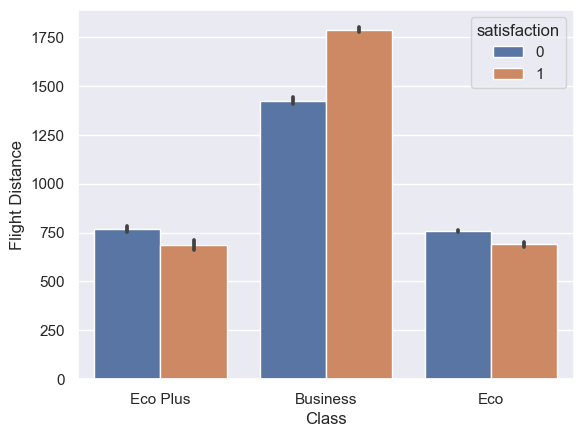

In [32]:
sns.barplot(data = data_eda,x=data_eda['Class'],hue=data_eda['satisfaction'],y=data_eda['Flight Distance'])

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

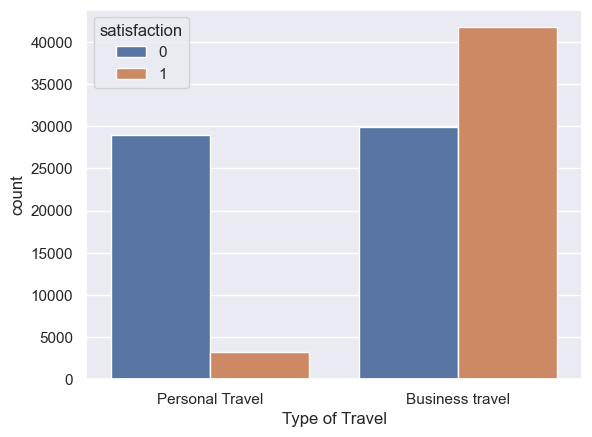

In [33]:
sns.countplot(data = data_eda,x=data_eda['Type of Travel'],hue=data_eda['satisfaction'])

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

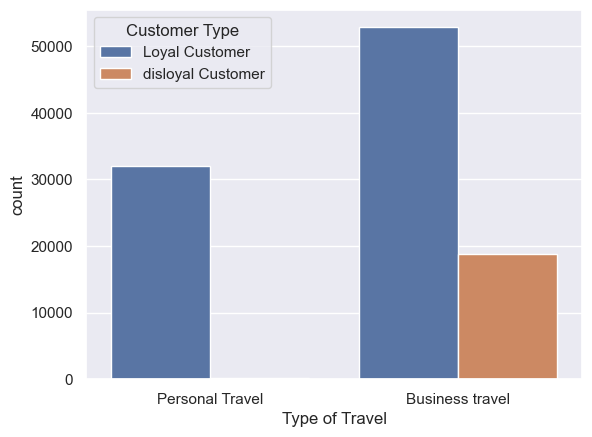

In [34]:
sns.countplot(data = data_eda,x=data_eda['Type of Travel'],hue=data_eda['Customer Type'])

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

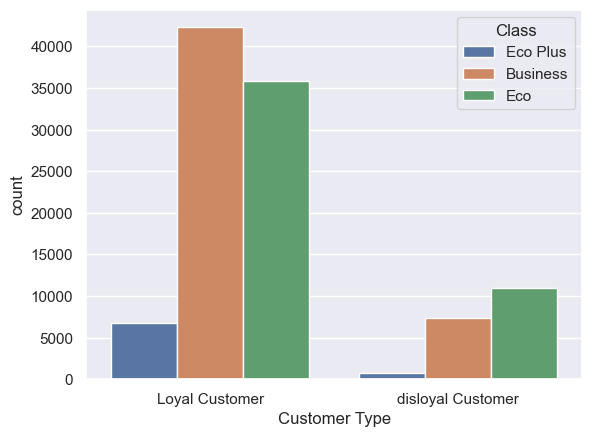

In [35]:
sns.countplot(data = data_eda,x=data_eda['Customer Type'],hue=data_eda['Class'])

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

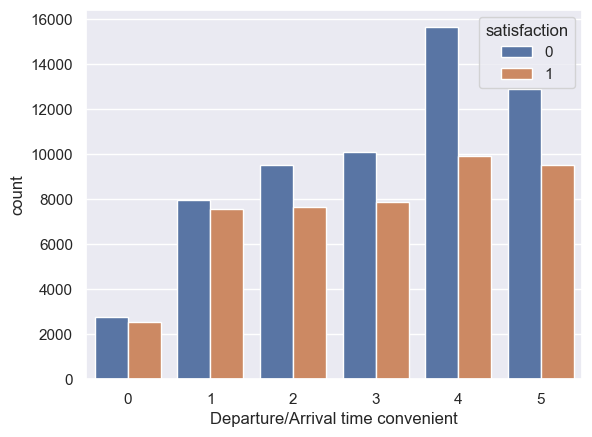

In [36]:
sns.countplot(data = data_eda,x=data_eda['Departure/Arrival time convenient'],hue=data_eda['satisfaction'])

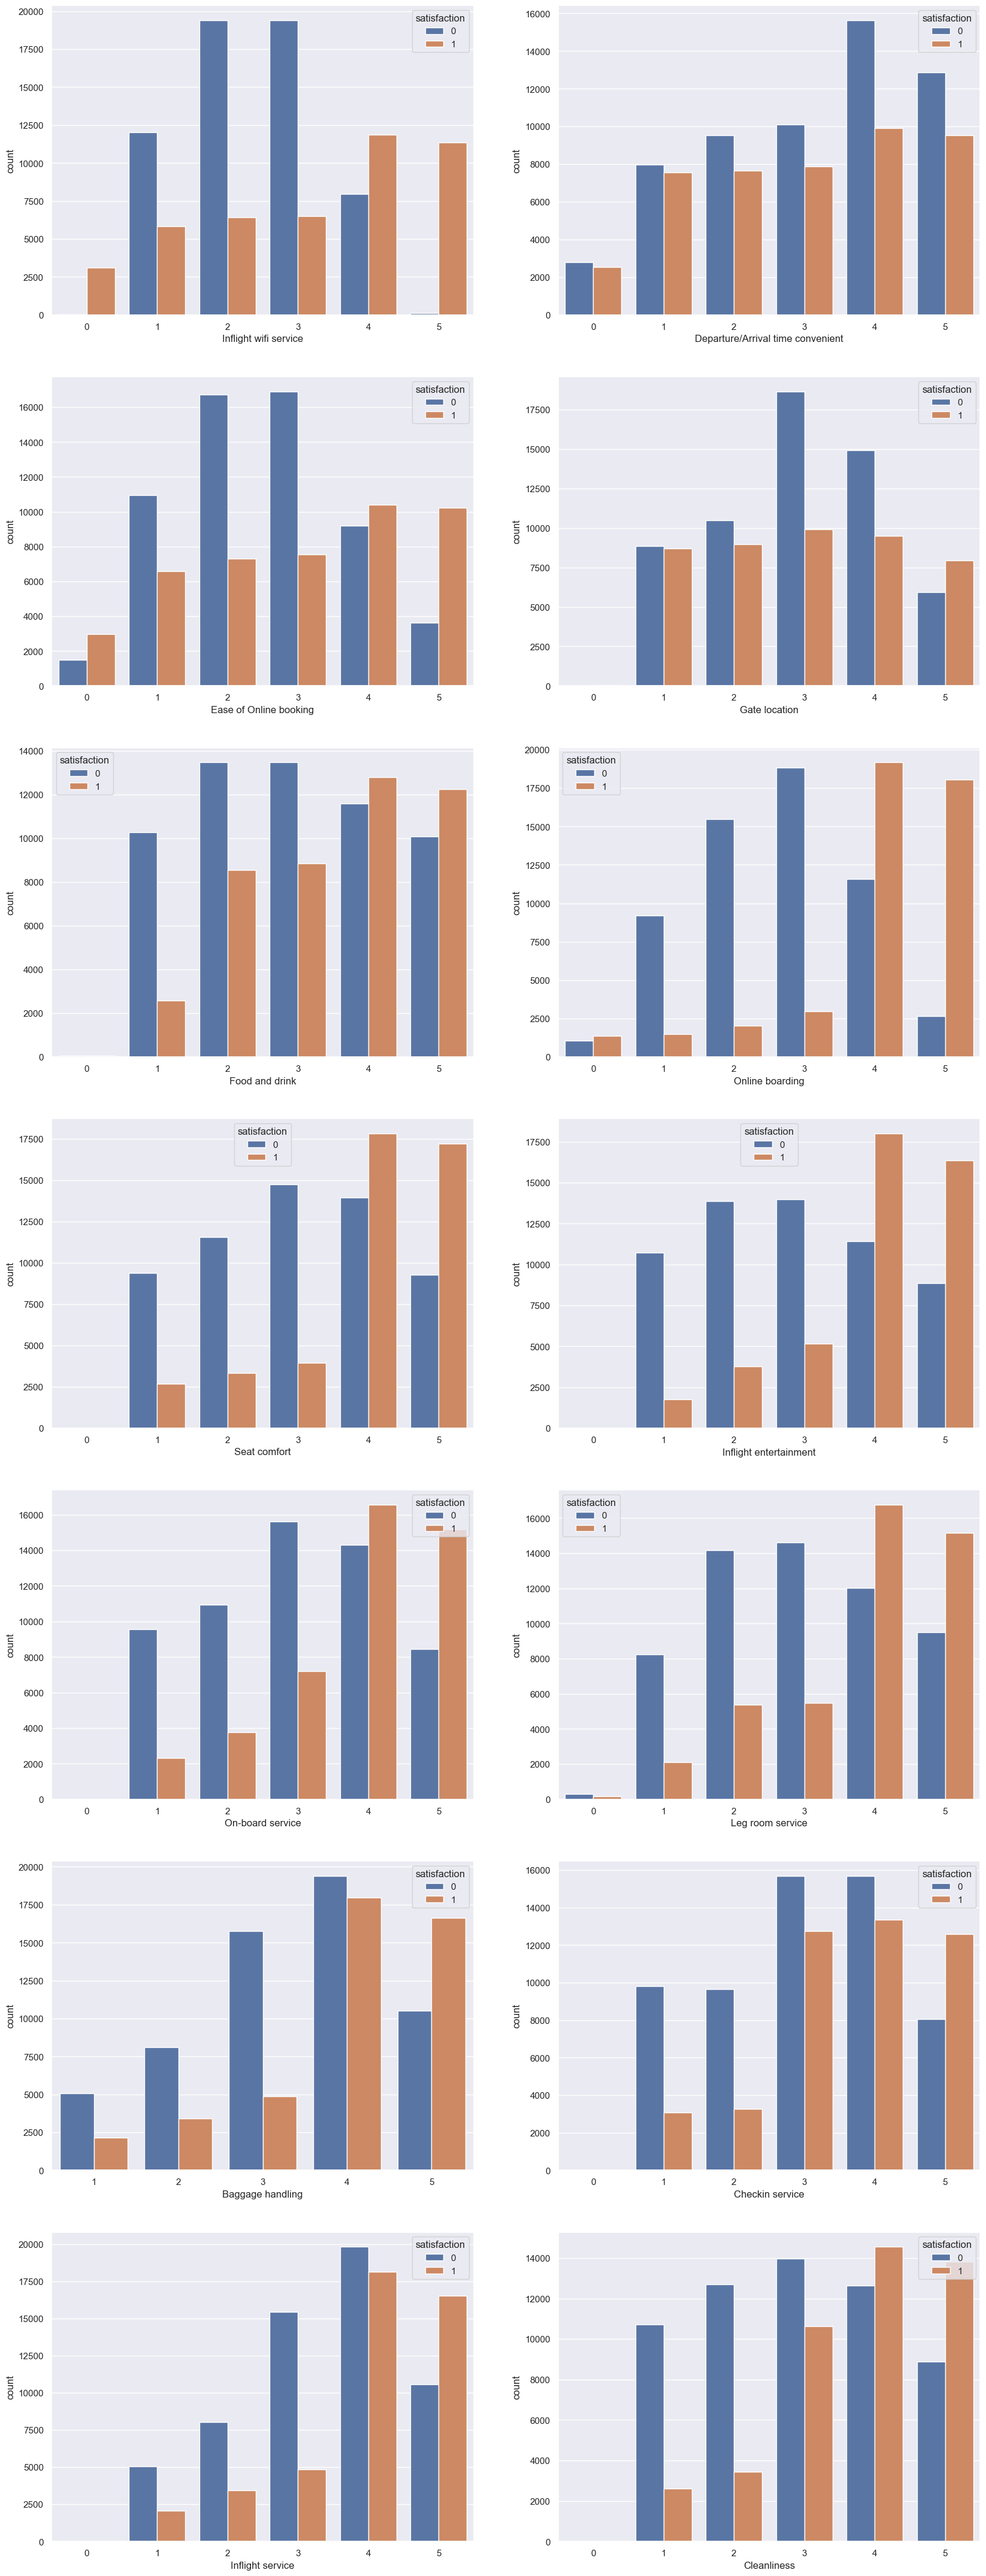

In [42]:
services = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
fig, ax = plt.subplots(7, 2, figsize = (20, 55))

for i, service in enumerate(services):
    sns.countplot(data=data_eda,x=service, hue = "satisfaction", ax = ax[i // 2, i % 2])
plt.show()

Data Modelling

In [79]:
models = []
auc_score = []

In [12]:
cat_attribs = ["Gender", "Customer Type", "Type of Travel", "Class"]
num_attribs = ["Age", "Flight Distance", 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
services = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [15]:
test_data = pd.read_csv('test.csv')

In [16]:
X_train_full = data.drop("satisfaction", axis = 1)
y_train_full = data["satisfaction"]
X_test = test_data.drop("satisfaction", axis = 1)
y_test = test_data["satisfaction"]

In [17]:
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(drop='first'))
])
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs),
    ("num", num_pipeline, num_attribs),
    ("services", SimpleImputer(strategy = "most_frequent"), services)
],remainder = 'passthrough')

X_train_full = full_pipeline.fit_transform(X_train_full)
X_test = full_pipeline.transform(X_test)

C:\Users\salvi\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [18]:
set_config(display='diagram')
full_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class']),
                                ('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Departu...s',
                                  'Arrival Delay in Minutes']),
                                ('services',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness'])])

In [19]:
X_train_full[0]

array([ 1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
       -1.7452793 , -0.73153876,  0.26639265,  0.07416916,  3.        ,
        4.        ,  3.        ,  1.        ,  5.        ,  3.        ,
        5.        ,  5.        ,  4.        ,  3.        ,  4.        ,
        4.        ,  5.        ,  5.        ])

In [20]:
print(X_train_full.shape)
print(X_test.shape)

(103904, 23)
(25976, 23)


In [50]:
y_train_full.replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
y_test.replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)


Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(random_state = 42, max_iter = 500)
log_reg_clf.fit(X_train_full, y_train_full)

LogisticRegression(max_iter=500, random_state=42)

In [77]:
y_pred = log_reg_clf.predict(X_test)
log_reg_acc = accuracy_score(y_test,y_pred)


In [78]:
log_reg_acc

0.8714967662457653

In [82]:
models.append("Logistic Regression")
auc_score.append(log_reg_acc)

SGD Classifier

In [83]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train_full, y_train_full)

SGDClassifier(random_state=42)

In [86]:
y_pred_sgd = sgd_clf.predict(X_test)
sgd_acc = accuracy_score(y_test,y_pred_sgd)

In [87]:
sgd_acc

0.8727286726208808

In [93]:
models.append("SGD Classifier")
auc_score.append(sgd_acc)

KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(15, weights='uniform')
knn_clf.fit(X_train_full, y_train_full)

KNeighborsClassifier(n_neighbors=15)

In [104]:
y_pred_knn = knn_clf.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

C:\Users\salvi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [105]:
knn_acc

0.9280874653526332

In [107]:
models.append("KNN")
auc_score.append(knn_acc)

SVM

In [108]:
from sklearn.svm import SVC
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train_full, y_train_full)

SVC(random_state=42)

In [109]:
y_pred_svm = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test,y_pred_svm)

In [110]:
svm_acc

0.9444102248229135

In [111]:
models.append("SVM")
auc_score.append(svm_acc)

Random Forest 

In [112]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train_full, y_train_full)

RandomForestClassifier(random_state=42)

In [114]:
y_pred_rfc = forest_clf.predict(X_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

In [115]:
rfc_acc

0.96311980289498

In [116]:
models.append("Random Forest")
auc_score.append(rfc_acc)

Best Models

In [122]:
models.remove('Logistic Regression')
models.remove('Logistic Regression')
models

['Logistic Regression', 'SGD Classifier', 'KNN', 'SVM', 'Random Forest']

In [121]:
auc_score

[0.8714967662457653,
 0.8727286726208808,
 0.9280874653526332,
 0.9444102248229135,
 0.96311980289498]

In [124]:
models = pd.DataFrame({"model_name":models, "auc_score": auc_score})

In [125]:
models.sort_values("auc_score", ascending = False)

,model_name,auc_score
4,Random Forest,0.963120
3,SVM,0.944410
2,KNN,0.928087
1,SGD Classifier,0.872729
0,Logistic Regression,0.871497
